In [68]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [69]:
df1 = pd.read_csv('data/features_basicas.csv', low_memory=False, index_col='person')
df1["proprosion"] = np.where(df1["cant_viewed_product"]>0, (df1["cant_checkouts"]/df1["cant_viewed_product"]),0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38829 entries, 4886f805 to 80aea0a0
Data columns (total 12 columns):
cant_conversions               38829 non-null float64
cant_checkouts                 38829 non-null float64
cant_viewed_product            38829 non-null float64
cant_searched_product          38829 non-null float64
cant_ad_campaign_hit           38829 non-null float64
ad_campaign_hit                38829 non-null bool
lead                           38829 non-null bool
cant_brand_listing             38829 non-null float64
brand listing                  38829 non-null bool
total_sesiones                 38829 non-null int64
promedio_eventos_por_sesion    38829 non-null float64
proprosion                     38829 non-null float64
dtypes: bool(3), float64(8), int64(1)
memory usage: 3.1+ MB


In [70]:
df2 = pd.read_csv('data/vistas_promedio.csv', low_memory=False, index_col='person')
#df3 = pd.read_csv('data/featureUsuarioRealizaAlMenos10EventosEn20Minutos.csv', low_memory=False, index_col='person')
df4 = pd.read_csv('data/features_mas_vistos.csv', low_memory=False, index_col='person')

df_unidos = df1.join(df2)
#df_unidos = df_unidos.join(df3).fillna(0)
df_unidos = df_unidos.join(df4).fillna(0)
#df_unidos = df_unidos.drop("Unnamed: 0",1)
df_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38829 entries, 4886f805 to 80aea0a0
Data columns (total 17 columns):
cant_conversions               38829 non-null float64
cant_checkouts                 38829 non-null float64
cant_viewed_product            38829 non-null float64
cant_searched_product          38829 non-null float64
cant_ad_campaign_hit           38829 non-null float64
ad_campaign_hit                38829 non-null bool
lead                           38829 non-null bool
cant_brand_listing             38829 non-null float64
brand listing                  38829 non-null bool
total_sesiones                 38829 non-null int64
promedio_eventos_por_sesion    38829 non-null float64
proprosion                     38829 non-null float64
mas_prom                       38829 non-null float64
vio_mas_apple                  38829 non-null float64
vio_mas_samsung                38829 non-null float64
vio_mas_motorola               38829 non-null float64
vio_mas_lg                     38

In [71]:
labels = pd.read_csv('data/labels_training_set.csv', low_memory=False, index_col='person')


df_test = df_unidos.join(labels, how= "inner")
df_test.head()

,cant_conversions,cant_checkouts,cant_viewed_product,cant_searched_product,cant_ad_campaign_hit,ad_campaign_hit,lead,cant_brand_listing,brand listing,total_sesiones,promedio_eventos_por_sesion,proprosion,mas_prom,vio_mas_apple,vio_mas_samsung,vio_mas_motorola,vio_mas_lg,label
person,,,,,,,,,,,,,,,,,,
ad93850f,0.0,1.0,20.0,0.0,10.0,True,False,15.0,True,5,13.000000,0.050000,0.0,1.0,0.0,0.0,0.0,0
1b9f7cf6,0.0,1.0,9.0,8.0,0.0,False,False,3.0,True,3,8.333333,0.111111,0.0,1.0,0.0,0.0,0.0,0
de8fe91b,0.0,1.0,27.0,13.0,0.0,False,False,3.0,True,2,26.500000,0.037037,0.0,0.0,1.0,0.0,0.0,0
45baf068,0.0,1.0,6.0,0.0,5.0,True,False,3.0,True,1,20.000000,0.166667,0.0,0.0,1.0,0.0,0.0,0
99abca5a,2.0,18.0,630.0,5.0,12.0,True,True,30.0,True,49,16.714286,0.028571,1.0,0.0,0.0,1.0,0.0,0


In [72]:
X, y = df_test.iloc[:,:-1],df_test.iloc[:,-1]

In [73]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [75]:
xg_reg = xgb.XGBClassifier(objective='binary:logistic',max_depth=13,learning_rate=0.1,n_estimators=500,silent=True,n_jobs=-1)

In [76]:
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [77]:
score=xg_reg.score(X_test,y_test)*100
print(score)

94.6433170229


In [78]:
preds = xg_reg.predict(X_test)

In [79]:
"""from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
model = xgboost.XGBClassifier(objective='binary:logistic',max_depth=13,learning_rate=0.1,n_estimators=500,silent=True,n_jobs=-1)
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
model.fit(X_train,y_train)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))"""

'from numpy import loadtxt\nimport xgboost\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_val_score\nmodel = xgboost.XGBClassifier(objective=\'binary:logistic\',max_depth=13,learning_rate=0.1,n_estimators=500,silent=True,n_jobs=-1)\nkfold = StratifiedKFold(n_splits=10, random_state=7)\nresults = cross_val_score(model, X_train, y_train, cv=kfold)\nmodel.fit(X_train,y_train)\nprint("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))'

In [80]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:27:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=

In [81]:
cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.460087,0.000270,0.460070,0.000468
1,0.424644,0.000796,0.424525,0.000687
2,0.393734,0.001108,0.393598,0.001254
3,0.366650,0.001710,0.366337,0.001443
4,0.343086,0.002286,0.342654,0.001784
5,0.322940,0.002811,0.322442,0.002066
6,0.305655,0.003352,0.305067,0.002329
7,0.290267,0.003706,0.289573,0.002386
8,0.277347,0.004046,0.276599,0.002631
9,0.266214,0.004551,0.265362,0.002583


In [82]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.231445


In [83]:
df_submit = pd.read_csv('data/trocafone_kaggle_test.csv', low_memory=False, index_col='person')
df_events = df_submit.join(df_unidos, how='inner')
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19415 entries, 4886f805 to 80aea0a0
Data columns (total 17 columns):
cant_conversions               19415 non-null float64
cant_checkouts                 19415 non-null float64
cant_viewed_product            19415 non-null float64
cant_searched_product          19415 non-null float64
cant_ad_campaign_hit           19415 non-null float64
ad_campaign_hit                19415 non-null bool
lead                           19415 non-null bool
cant_brand_listing             19415 non-null float64
brand listing                  19415 non-null bool
total_sesiones                 19415 non-null int64
promedio_eventos_por_sesion    19415 non-null float64
proprosion                     19415 non-null float64
mas_prom                       19415 non-null float64
vio_mas_apple                  19415 non-null float64
vio_mas_samsung                19415 non-null float64
vio_mas_motorola               19415 non-null float64
vio_mas_lg                     19

In [84]:
kaggle_pred = xg_reg.predict_proba(df_events)
proba_de_comprar = [x[1] for x in kaggle_pred]
series = pd.Series(proba_de_comprar)
df_submit['label'] = abs(series.values)


In [85]:
df_submit.to_csv('submit_xg.csv')

In [58]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:24:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=

In [59]:
import matplotlib.pyplot as plt

"""xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()"""

"xgb.plot_tree(xg_reg,num_trees=0)\nplt.rcParams['figure.figsize'] = [100, 100]\nplt.show()"

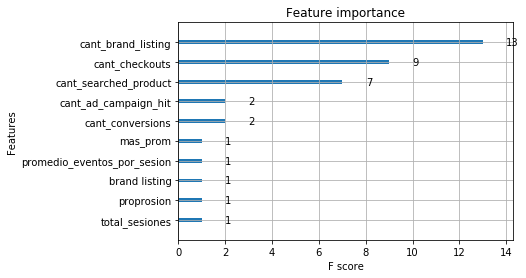

In [60]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()